# test1: 测试三种不同的权重初始化方法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn

In [2]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    
    return s

In [3]:
def relu(x):
    s = np.maximum(0,x)
    
    return s

In [4]:
def compute_loss(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    loss = 1./m * np.nansum(logprobs)
    
    return loss

In [5]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
    return a3, cache

In [6]:
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)
    
    gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

In [7]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(L):
        parameters[f"W{str(k+1)}"] = parameters[f"W{str(k+1)}"] - learning_rate * grads[f"dW{str(k+1)}"]
        parameters[f"b{str(k+1)}"] = parameters[f"b{str(k+1)}"] - learning_rate * grads[f"db{str(k+1)}"]

    return parameters

In [8]:
def predict(X, y, parameters):
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    a3, caches = forward_propagation(X, parameters)
    for i in range(a3.shape[1]):
        p[0,i] = 1 if a3[0,i] > 0.5 else 0
    print(f"Accuracy: {str(np.mean((p[0,:] == y[0,:])))}")

    return p

In [9]:
def predict_dec(parameters, X):
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3 > 0.5)

    return predictions

In [10]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [11]:
def load_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)

    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    test_X = test_X.T
    test_Y = test_Y.reshape((1, test_Y.shape[0]))
    return train_X, train_Y, test_X, test_Y

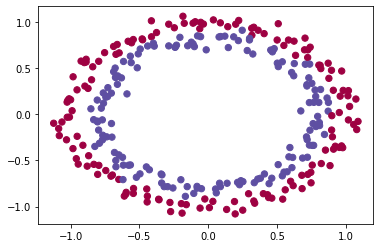

In [12]:
train_X, train_Y, test_X, test_Y = load_dataset()

In [13]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters[f"W{str(l)}"] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters[f"b{str(l)}"] = 0

    return parameters

In [14]:
parameters = initialize_parameters_zeros([3, 2, 1])
print(f"W1 = {str(parameters['W1'])}")
print(f"b1 = {str(parameters['b1'])}")
print(f"W2 = {str(parameters['W2'])}")
print(F"b2 = {str(parameters['b2'])}")

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = 0
W2 = [[0. 0.]]
b2 = 0


In [15]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters[f"W{str(l)}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        parameters[f"b{str(l)}"] = np.zeros((layers_dims[l], 1))

    return parameters

In [16]:
parameters = initialize_parameters_random([3, 2, 1])
print(f"W1 = {str(parameters['W1'])}")
print(f"b1 = {str(parameters['b1'])}")
print(f"W2 = {str(parameters['W2'])}")
print(F"b2 = {str(parameters['b2'])}")

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


In [17]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1

    for l in range(1, L + 1):
        parameters[f"W{str(l)}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        parameters[f"b{str(l)}"] = np.zeros((layers_dims[l], 1))

    return parameters

In [18]:
parameters = initialize_parameters_he([2, 4, 1])
print(f"W1 = {str(parameters['W1'])}")
print(f"b1 = {str(parameters['b1'])}")
print(f"W2 = {str(parameters['W2'])}")
print(f"b2 = {str(parameters['b2'])}")

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


In [19]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]

    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}:{cost}")
            costs.append(cost)
    
    plt.plot(costs)
    plt.ylabel("cost")
    plt.xlabel("iterations (per hundreds)")
    plt.title(f"Learning rate = {str(learning_rate)}")
    plt.show()

    return parameters
        

Cost after iteration 0:0.6931471805599453
Cost after iteration 1000:0.6931471805599453
Cost after iteration 2000:0.6931471805599453
Cost after iteration 3000:0.6931471805599453
Cost after iteration 4000:0.6931471805599453
Cost after iteration 5000:0.6931471805599453
Cost after iteration 6000:0.6931471805599453
Cost after iteration 7000:0.6931471805599453
Cost after iteration 8000:0.6931471805599453
Cost after iteration 9000:0.6931471805599453
Cost after iteration 10000:0.6931471805599455
Cost after iteration 11000:0.6931471805599453
Cost after iteration 12000:0.6931471805599453
Cost after iteration 13000:0.6931471805599453
Cost after iteration 14000:0.6931471805599453


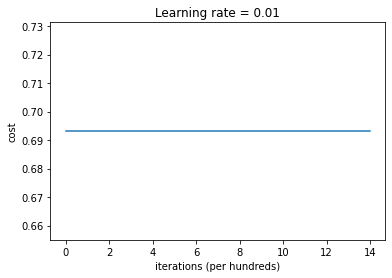

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


d:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
parameters = model(train_X, train_Y, initialization="zeros")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [21]:
print(f"predictions_train = {str(predictions_train)}")
print(f"predictions_test = {str(predictions_test)}")

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


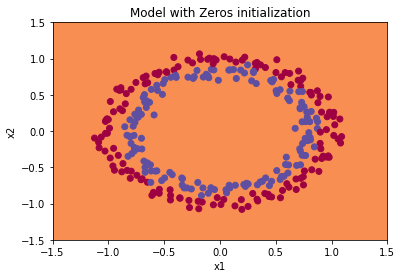

In [22]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y.ravel())

Cost after iteration 0:inf


d:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
d:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Cost after iteration 1000:0.6239567039908781
Cost after iteration 2000:0.5978043872838292
Cost after iteration 3000:0.563595830364618
Cost after iteration 4000:0.5500816882570866
Cost after iteration 5000:0.5443417928662615
Cost after iteration 6000:0.5373553777823036
Cost after iteration 7000:0.4700141958024487
Cost after iteration 8000:0.3976617665785177
Cost after iteration 9000:0.39344405717719166
Cost after iteration 10000:0.39201765232720626
Cost after iteration 11000:0.38910685278803786
Cost after iteration 12000:0.38612995897697244
Cost after iteration 13000:0.3849735792031832
Cost after iteration 14000:0.38275100578285265


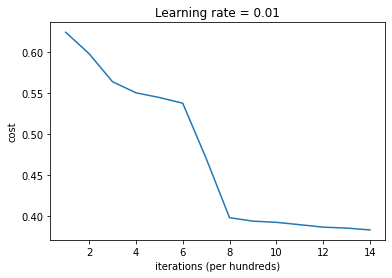

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


d:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
parameters = model(train_X, train_Y, initialization="random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [24]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


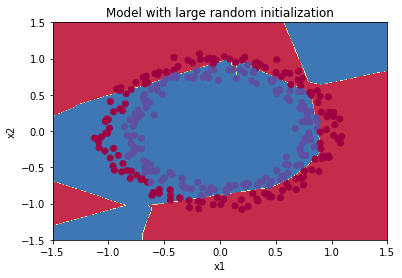

In [25]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y.ravel())

Cost after iteration 0:0.8830537463419761
Cost after iteration 1000:0.6879825919728063
Cost after iteration 2000:0.6751286264523371
Cost after iteration 3000:0.6526117768893807
Cost after iteration 4000:0.6082958970572938
Cost after iteration 5000:0.5304944491717495
Cost after iteration 6000:0.4138645817071794
Cost after iteration 7000:0.3117803464844441
Cost after iteration 8000:0.23696215330322562
Cost after iteration 9000:0.18597287209206836
Cost after iteration 10000:0.15015556280371817
Cost after iteration 11000:0.12325079292273552
Cost after iteration 12000:0.09917746546525932
Cost after iteration 13000:0.08457055954024274
Cost after iteration 14000:0.07357895962677362


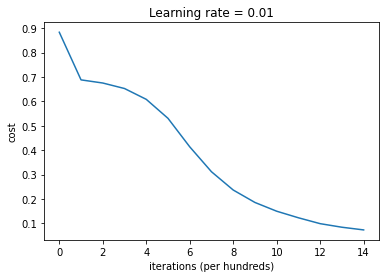

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


d:\Program Files\Python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
parameters = model(train_X, train_Y, initialization="he")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

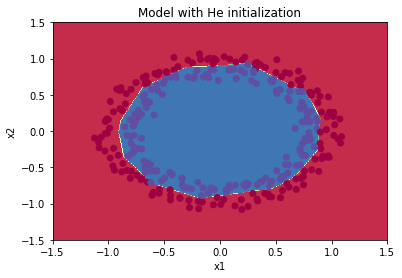

In [27]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y.ravel())